# Better Python Workflow

---

In [1]:
data_file = 'data/gapminder_five_year_dirty.txt'

# conda install pandas

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
import logging

# create logger with 'spam_application'
logger = logging.getLogger('better_workflow')
logger.setLevel(logging.DEBUG)

# create file handler which logs even debug messages
fh = logging.FileHandler('better_workflow.log')
fh.setLevel(logging.DEBUG)

# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.ERROR)

# create formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)
ch.setFormatter(formatter)

# add the handlers to the logger
logger.addHandler(fh)
logger.addHandler(ch)

In [4]:
logging.info("Reading Data into pandas")
df_original = pd.read_csv(data_file, sep='\t')

In [5]:
logging.debug(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 5 columns):
year         1704 non-null int64
pop          1704 non-null float64
lifeExp      1704 non-null float64
gdpPercap    1704 non-null float64
region       1704 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 66.7+ KB


In [6]:
logging.debug(df_original.region.unique())

In [7]:
logging.debug('Replace: Africa_Congo, Dem. Rep., Africa_Democratic Republic of the Congo, Africa_Congo, Rep. with Africa_Congo, Democratic Republic')
df_original.region.replace('Africa_Congo, Dem. Rep.', 'Africa_Congo, Democratic Republic')
df_original.region.replace('Africa_Democratic Republic of the Congo', 'Africa_Congo, Democratic Republic')
df_original.region.replace('Africa_Congo, Rep.', 'Africa_Congo, Democratic Republic')
df_original.region.replace('Asia_china', 'Asia_China')
df_original.region.replace('Americas_Colombia    ', 'Americas_Colombia')

0       Asia_Afghanistan
1       Asia_Afghanistan
2       Asia_Afghanistan
3       Asia_Afghanistan
4       Asia_Afghanistan
              ...       
1699     Africa_Zimbabwe
1700     Africa_Zimbabwe
1701     Africa_Zimbabwe
1702     Africa_Zimbabwe
1703     Africa_Zimbabwe
Name: region, Length: 1704, dtype: object

In [8]:
df_original['year'].describe()

count    1704.00000
mean     1979.50000
std        17.26533
min      1952.00000
25%      1965.75000
50%      1979.50000
75%      1993.25000
max      2007.00000
Name: year, dtype: float64

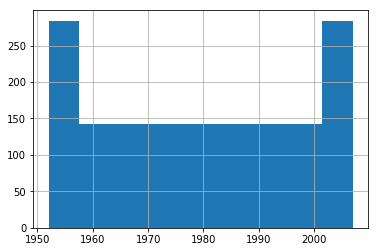

In [9]:
df_original.year.hist()